In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr
import numpy as np

import matplotlib.pyplot as plt

from affine import sample

/Users/Jed.Homer/miniconda3/envs/jax/lib/python3.9/site-packages/jax/_src/lib/__init__.py:33: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


In [10]:
@jax.jit
def log_prob(theta):
    x, y = jnp.split(theta, 2, axis=-1)
    return -(1. / 20. * (1.0 - x) ** 2. + 10.0 * (y - x ** 2.) ** 2.).squeeze()

In [11]:
rng = jr.PRNGKey(0)

# Number of parameters
n_params = 2

# Number of walkers (note you'll end up with a total of 2*n_walkers for this parallel variant of the affine sampler)
n_walkers = 500

rng, rng1, rng2 = jr.split(rng, 3)

# Initialize walkers and current state
walkers1 = jr.normal(rng1, shape=[n_walkers, n_params])
walkers2 = jr.normal(rng2, shape=[n_walkers, n_params])
current_state = [walkers1, walkers2]

In [13]:
# Number of MCMC steps to take (you'll end up with an MCMC chain with shape (n_steps, 2*n_walkers, n_parameters))
n_steps = 500

rng, _ = jr.split(rng)

# Run the sampler
chain = sample(rng, log_prob, n_steps, current_state)

100%|██████████| 499/499 [00:01<00:00, 495.99it/s]


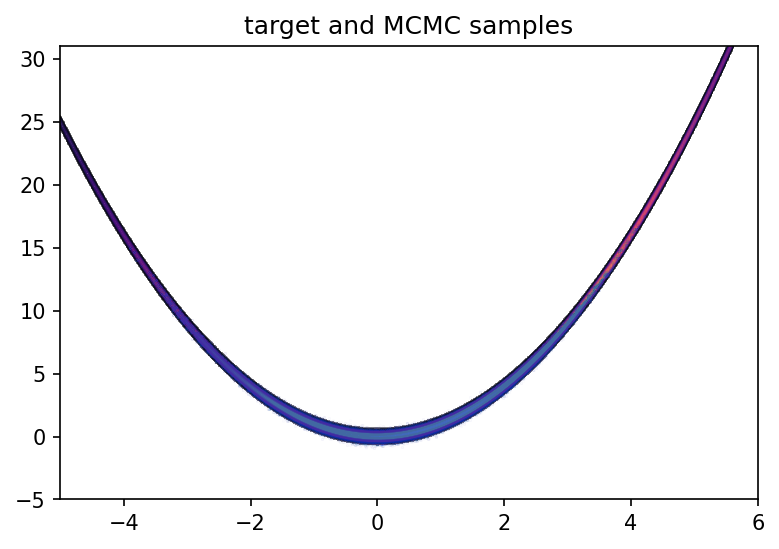

In [17]:
# How many burnin steps to remove
burnin_steps = 100

# Scatter + contours of target prob
plt.figure(dpi=150)
plt.title('target and MCMC samples')
plt.xlim(-5., 6.)
plt.ylim(-5., 31.)

x = np.linspace(-5., 6., 500).astype(np.float32)
y = np.linspace(-5., 31., 500).astype(np.float32)

X, Y = jnp.meshgrid(x, y)
grid = jnp.stack([X, Y], axis=-1)
L = jnp.exp(log_prob(grid))

plt.contourf(
    x, y, L, 
    levels=jnp.array([0.01 * _ for _ in range(1, 100)]) * np.max(L.flatten()), 
    alpha=0.5,
    cmap="magma")
plt.scatter(
    *chain[burnin_steps:].T, 
    s=0.02, 
    color='royalblue', 
    alpha=0.05)
plt.show()